# selected samples for IMRL

In [1]:
import sys,os,io,shutil,subprocess
import glob
from importlib import reload
import numpy as np
import pandas as pd
pd.set_option('display.width', 200)
import pylab as plt
import matplotlib as mpl
from Bio import SeqIO, AlignIO
from Bio.Align import MultipleSeqAlignment
import seaborn as sns
from snipgenie import tools, aligners, app, trees, plotting
import toytree, toyplot

In [2]:
final = pd.read_csv('/storage/btbgenie/all_ireland_results/metadata.csv')

In [3]:
prev = pd.read_csv('/storage/btbgenie/imrl_mbovis1.csv').name

In [37]:
#remove redunancy at snp level
col = 'snp20'
x = final[final.group=='misc']
x['dup'] = x[col].replace(-1,np.nan)
x= x[(~x.duplicated('dup')) | (x.dup.isnull())]
x=x[~x['sample'].isin(['TB20-002600','TB20-001797','TB20-002596'])]
#print (x[col].value_counts())
#x = x[~x['sample'].isin(prev)]
print (len(x))
x[['sample','Species']].to_csv('/storage/btbgenie/imrl_mbovis.csv')

74


/tmp/ipykernel_1528008/3505971745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['dup'] = x[col].replace(-1,np.nan)


In [ ]:
def write_zipfiles(df, outfile):
    """Write a dataframe of sample files to a zip"""
    
    from zipfile import ZipFile
    zipObj = ZipFile(outfile, 'w')
    for i,r in df.iterrows():
        print (r['sample'])        
        zipObj.write(r.filename1,os.path.basename(r.filename1))
        zipObj.write(r.filename2,os.path.basename(r.filename2))    
    zipObj.close()
    return

write_zipfiles(x,'/home/farrell/Downloads/imrl_mbovis2.zip')

In [ ]:
idx = list(x['sample'])
aln = AlignIO.read('/storage/btbgenie/all_ireland_results/core.fa','fasta')
seqs = [rec for rec in aln if rec.id in idx]
aln = MultipleSeqAlignment(seqs)
print (len(aln))
treefile = trees.tree_from_aln(aln)

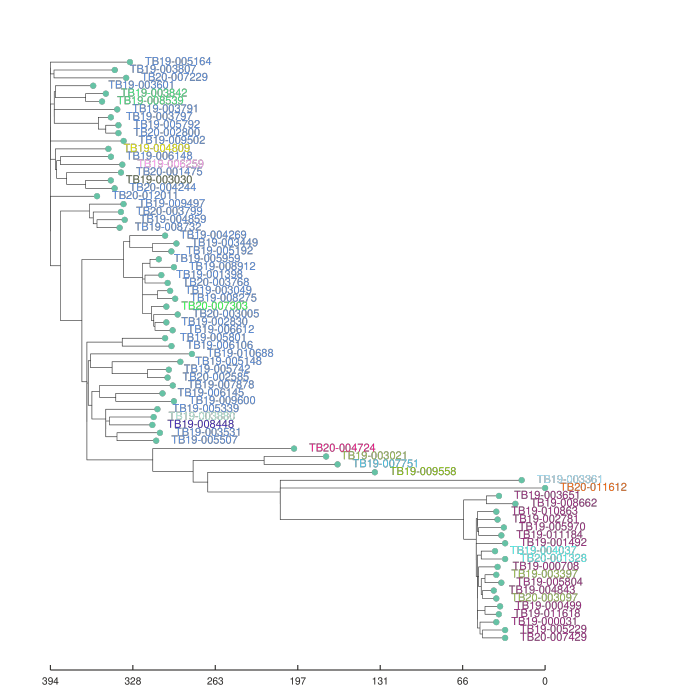

In [46]:
trees.draw_tree(treefile,final.set_index('sample'),'SB',width=700,height=700)